# Generate signal with "random walk" trend

- Observational level: $ y_{t} = F \cdot \theta_{t} + \varepsilon_{t} $
- State level: $ \theta_t = G \cdot \theta_{t - 1} + w_{t} $

With:
- $F = 1$
- $G = 1$
- $\varepsilon ~ N(0, V)$
- $w_{t} ~ N(0, W) $

Parameters:
- $V = 1$
- $W = 0.01$

Initial conditions:
- $ \theta_1 = 0  $

## Sample data

In [1]:
import matplotlib.pyplot as plt

import numpy as np

from scipy import stats

# Number of samples
n_samples = 10000
rng = np.random.RandomState(43)

# Set up variances
v = 1
w = .01

# Generate the random noise
obs_noise = stats.norm(0, v).rvs(n_samples, rng)
state_noise = stats.norm(0, w).rvs(n_samples, rng)

# Generate the variables
theta = np.zeros(n_samples)
y = obs_noise
for n in np.arange(n_samples - 1) + 1:
    theta[n] = theta[n - 1] + state_noise[n]
    y[n] += theta[n]

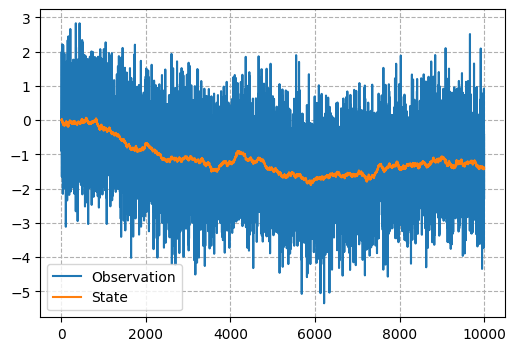

In [2]:
_, ax = plt.subplots(figsize=(6, 4))
ax.grid(ls='--')

ax.plot(np.arange(n_samples), y, label='Observation')
ax.plot(np.arange(n_samples), theta, c='tab:orange', label='State')

ax.legend()

## Fit a model using statsmodels

In [3]:
import statsmodels.api as sm

mod_uc = sm.tsa.UnobservedComponents(
    endog=y,
    level='llevel',
)

res_uc = mod_uc.fit(method='powell')

Optimization terminated successfully.
         Current function value: 1.423592
         Iterations: 3
         Function evaluations: 89


In [4]:
print(res_uc.summary())

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                10000
Model:                    local level   Log Likelihood              -14235.919
Date:                Mon, 25 Nov 2024   AIC                          28475.837
Time:                        15:55:21   BIC                          28490.258
Sample:                             0   HQIC                         28480.718
                              - 10000                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     1.0004      0.014     69.841      0.000       0.972       1.028
sigma2.level       7.81e-05   2.41e-05      3.247      0.001     3.1e-05       0.000
Ljung-Box (L1) (Q):         

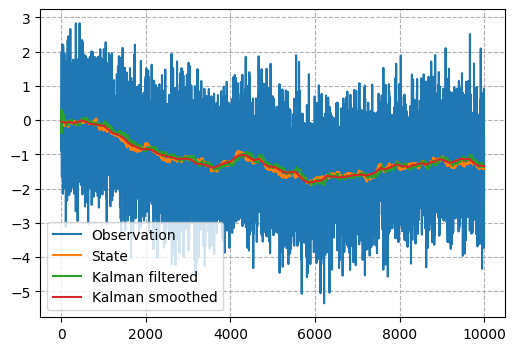

In [5]:
_, ax = plt.subplots(figsize=(6, 4))
ax.grid(ls='--')

x = np.arange(n_samples)
ax.plot(x, y, label='Observation')
ax.plot(x, theta, c='tab:orange', label='State')
ax.plot(x, res_uc.level.filtered, c='tab:green', label='Kalman filtered')
ax.plot(x, res_uc.level.smoothed, c='tab:red', label='Kalman smoothed')


ax.legend()

# Generate signal with linear trend component

- Observational level: $ y_{t} = F^{T} \cdot \theta_{t} + \varepsilon_{t} $
- State level: $ \theta_t = G \cdot \theta_{1, t - 1} + \theta_{2, t - 1} + w_{1, t} $

With:
- $F^{T} = (1, 0)$
- $G = ((1, 1), (0, 1))$
- $\varepsilon ~ N(0, V)$
- $w_{t} ~ N(0, W) $

Parameters:
- $V = 1$
- $W = 0.01$

Initial conditions:
- $ \theta_1 = 0  $

## Sample data

In [34]:
w

array([[0.001, 1.   ],
       [1.   , 0.001]])

In [51]:
import matplotlib.pyplot as plt

import numpy as np

from scipy import stats

# Number of samples
n_samples = 10000
rng = np.random.RandomState(72)

# Set up variances
v = 100
w = np.identity(2) * 1e-4

# Generate the random noise
obs_noise = stats.norm(0, v).rvs(n_samples, rng)
state_noise = stats.multivariate_normal([0, 0], w).rvs(n_samples, rng)

# Generate the variables
theta = np.zeros((n_samples, 2))
y = obs_noise
for n in np.arange(n_samples - 1) + 1:
    theta[n, 0] = theta[n - 1, 0] + theta[n - 1, 1] + state_noise[n, 0]
    theta[n, 1] = theta[n - 1, 1] + state_noise[n, 1]
    y[n] += theta[n, 0]

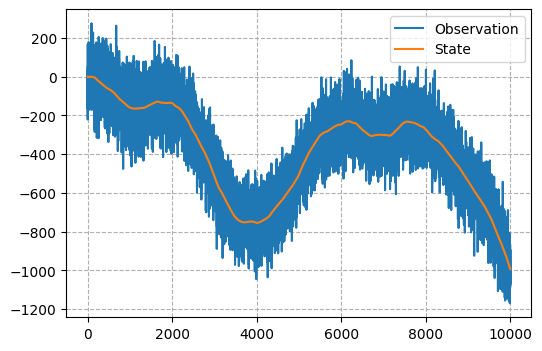

In [52]:
_, ax = plt.subplots(figsize=(6, 4))
ax.grid(ls='--')

ax.plot(np.arange(n_samples), y, label='Observation')
ax.plot(np.arange(n_samples), theta[:, 0], c='tab:orange', label='State')

ax.legend()

In [53]:
np.matrix(w) * w

matrix([[1.e-08, 0.e+00],
        [0.e+00, 1.e-08]])

## Fit a model using statsmodels

In [54]:
import statsmodels.api as sm

mod_uc = sm.tsa.UnobservedComponents(
    endog=y,
    level='lltrend',
)

res_uc = mod_uc.fit(method='powell')

Optimization terminated successfully.
         Current function value: 6.040672
         Iterations: 3
         Function evaluations: 127


In [55]:
print(res_uc.summary())

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                10000
Model:             local linear trend   Log Likelihood              -60406.723
Date:                Mon, 25 Nov 2024   AIC                         120819.446
Time:                        16:21:49   BIC                         120841.076
Sample:                             0   HQIC                        120826.767
                              - 10000                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular  1.019e+04    146.799     69.423      0.000    9903.531    1.05e+04
sigma2.level         0.0006      0.568      0.001      0.999      -1.113       1.114
sigma2.trend      8.781e-05 

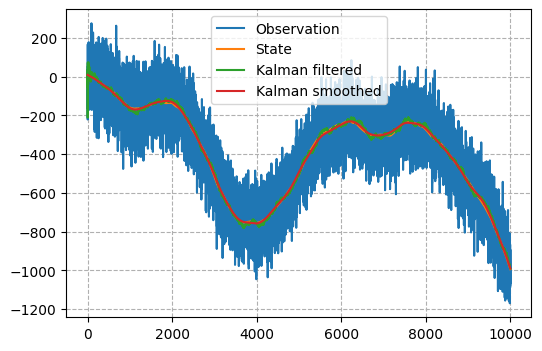

In [56]:
_, ax = plt.subplots(figsize=(6, 4))
ax.grid(ls='--')

x = np.arange(n_samples)
ax.plot(x, y, label='Observation')
ax.plot(x, theta[:, 0], c='tab:orange', label='State')
ax.plot(x, res_uc.level.filtered, c='tab:green', label='Kalman filtered')
ax.plot(x, res_uc.level.smoothed, c='tab:red', label='Kalman smoothed')


ax.legend()